# AutoEncoder

In [2]:
import keras 
from keras.layers.core import Dense,Activation
from keras.datasets import mnist
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [7]:
# 学習データの準備
(x_train,_),(x_test,_) = mnist.load_data()
# 正規化(0-1)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
#(60000,28,28) -> (60000,784)
n_in = x_train.shape[1]*x_train.shape[2]

x_train = x_train.reshape((len(x_train),n_in))
x_test = x_test.reshape((len(x_test),n_in))
#x_train.shape

(60000, 784)

In [10]:
#モデル定義
n_out = n_in #input/output
encoding_dim = 32 #hidden layer
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim,activation='relu',input_dim=n_in))
autoencoder.add(Dense(n_out,activation='sigmoid'))
autoencoder.summary()
autoencoder.compile(optimizer='adam',
                    loss = 'binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
#学習
autoencoder.fit(x_train,
                x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s - loss: 0.2717 - val_loss: 0.1880
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 0.1705 - val_loss: 0.1534
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.1442 - val_loss: 0.1340
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.1291 - val_loss: 0.1218
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.1188 - val_loss: 0.1134
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.1118 - val_loss: 0.1079
Epoch 7/10
60000/60000 [==============================] - 5s - loss: 0.1068 - val_loss: 0.1035
Epoch 8/10
60000/60000 [==============================] - 5s - loss: 0.1031 - val_loss: 0.1003
Epoch 9/10
60000/60000 [==============================] - 4s - loss: 0.1003 - val_loss: 0.0979
Epoch 10/10
60000/60000 [==============================] - 4s - loss: 0.0982 - val_loss: 0.0961

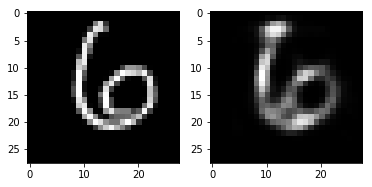

In [16]:
plt.subplot(1,2,1)
plt.imshow(x_test[100].reshape(28,28))
plt.gray()
plt.subplot(1,2,2)
decoded_image = autoencoder.predict(x_test)
plt.imshow(decoded_image[100].reshape(28,28))
plt.gray()

auto-encoderを書く上でencoderとdecoderを分ける書き方の方が良いのかもしれない.  
Sequential使うよりFunctionAPI使った方が良い感?  